In [1]:
import requests
import json

url = "https://glints.com/api/graphql"

payload = json.dumps({
  "operationName": "searchJobs",
  "variables": {
    "data": {
      "SearchTerm": "Data Scientist",
      "CountryCode": "ID",
      "CityId": [
        28904
      ],
      "limit": 30,
      "offset": 90,
      "includeExternalJobs": True,
      "sources": [
        "NATIVE",
        "SUPER_POWERED"
      ],
      "searchVariant": "QUERY_EXPANSION"
    }
  },
  "query": "query searchJobs($data: JobSearchConditionInput!) {\n  searchJobs(data: $data) {\n    jobsInPage {\n      id\n      title\n      isRemote\n      status\n      createdAt\n      updatedAt\n      isActivelyHiring\n      isHot\n      shouldShowSalary\n      salaryEstimate {\n        minAmount\n        maxAmount\n        CurrencyCode\n        __typename\n      }\n      company {\n        ...CompanyFields\n        __typename\n      }\n      citySubDivision {\n        id\n        name\n        __typename\n      }\n      city {\n        ...CityFields\n        __typename\n      }\n      country {\n        ...CountryFields\n        __typename\n      }\n      category {\n        id\n        name\n        __typename\n      }\n      salaries {\n        ...SalaryFields\n        __typename\n      }\n      minYearsOfExperience\n      maxYearsOfExperience\n      source\n      __typename\n    }\n    totalJobs\n    __typename\n  }\n}\n\nfragment CompanyFields on Company {\n  id\n  name\n  logo\n  __typename\n}\n\nfragment CityFields on City {\n  id\n  name\n  __typename\n}\n\nfragment CountryFields on Country {\n  code\n  name\n  __typename\n}\n\nfragment SalaryFields on JobSalary {\n  id\n  salaryType\n  salaryMode\n  maxAmount\n  minAmount\n  CurrencyCode\n  __typename\n}\n"
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)


{"data":{"searchJobs":{"jobsInPage":[{"id":"9a3c14dc-3ae0-4130-867e-13e108545fcf","title":"Data Analyst","isRemote":false,"status":"OPEN","createdAt":"2023-03-16T02:00:22.176Z","updatedAt":"2023-04-06T01:09:21.987Z","isActivelyHiring":false,"isHot":false,"shouldShowSalary":true,"salaryEstimate":null,"company":{"id":"dea7f014-6b44-450b-acbd-a53562209c25","name":"Eduwork.id","logo":"a3a0b0a3454e5dab90d591e9361dd6e0.jpg","__typename":"Company"},"citySubDivision":{"id":90,"name":"Sunter","__typename":"CitySubDivision"},"city":{"id":28904,"name":"Jakarta","__typename":"City"},"country":{"code":"ID","name":"Indonesia","__typename":"Country"},"category":{"id":6,"name":"Product Management","__typename":"JobCategory"},"salaries":[],"minYearsOfExperience":3,"maxYearsOfExperience":5,"source":"NATIVE","__typename":"Job"},{"id":"743bbb9d-bef9-4ebe-9451-afe672779fc2","title":"Data Engineer","isRemote":false,"status":"OPEN","createdAt":"2023-02-27T07:22:03.756Z","updatedAt":"2023-04-06T01:09:21.987Z"

In [2]:
# Ganti tipe ke JSON
import json

json_data = json.loads(response.text)
json_data

{'data': {'searchJobs': {'jobsInPage': [{'id': '9a3c14dc-3ae0-4130-867e-13e108545fcf',
     'title': 'Data Analyst',
     'isRemote': False,
     'status': 'OPEN',
     'createdAt': '2023-03-16T02:00:22.176Z',
     'updatedAt': '2023-04-06T01:09:21.987Z',
     'isActivelyHiring': False,
     'isHot': False,
     'shouldShowSalary': True,
     'salaryEstimate': None,
     'company': {'id': 'dea7f014-6b44-450b-acbd-a53562209c25',
      'name': 'Eduwork.id',
      'logo': 'a3a0b0a3454e5dab90d591e9361dd6e0.jpg',
      '__typename': 'Company'},
     'citySubDivision': {'id': 90,
      'name': 'Sunter',
      '__typename': 'CitySubDivision'},
     'city': {'id': 28904, 'name': 'Jakarta', '__typename': 'City'},
     'country': {'code': 'ID', 'name': 'Indonesia', '__typename': 'Country'},
     'category': {'id': 6,
      'name': 'Product Management',
      '__typename': 'JobCategory'},
     'salaries': [],
     'minYearsOfExperience': 3,
     'maxYearsOfExperience': 5,
     'source': 'NATIVE',

In [5]:
# Tabulasi
import pandas as pd

df = pd.json_normalize(json_data['data']['searchJobs']['jobsInPage'])
df.head()

,id,title,isRemote,status,createdAt,updatedAt,isActivelyHiring,isHot,shouldShowSalary,salaryEstimate,...,country.name,country.__typename,category.id,category.name,category.__typename,citySubDivision,salaryEstimate.minAmount,salaryEstimate.maxAmount,salaryEstimate.CurrencyCode,salaryEstimate.__typename
0,9a3c14dc-3ae0-4130-867e-13e108545fcf,Data Analyst,False,OPEN,2023-03-16T02:00:22.176Z,2023-04-06T01:09:21.987Z,False,False,True,NaN,...,Indonesia,Country,6,Product Management,JobCategory,NaN,NaN,NaN,NaN,NaN
1,743bbb9d-bef9-4ebe-9451-afe672779fc2,Data Engineer,False,OPEN,2023-02-27T07:22:03.756Z,2023-04-06T01:09:21.987Z,False,False,True,NaN,...,Indonesia,Country,2,Data Science,JobCategory,NaN,NaN,NaN,NaN,NaN
2,709f6960-204e-4f97-a0d0-3e9da82a9df3,Data Analyst,False,OPEN,2023-02-24T07:57:52.169Z,2023-04-06T01:09:21.987Z,False,False,True,NaN,...,Indonesia,Country,1,Software Engineering,JobCategory,NaN,NaN,NaN,NaN,NaN
3,d2d39ed1-6fab-40bd-b2d6-0a9baa114152,Data Anlayst,False,OPEN,2023-02-24T03:13:08.118Z,2023-04-06T01:09:21.987Z,False,False,True,NaN,...,Indonesia,Country,52,Administrative,JobCategory,NaN,NaN,NaN,NaN,NaN
4,ad6dd638-5d50-4e8d-8cb4-167c540dc768,Data Engineer,False,OPEN,2023-02-22T09:39:06.395Z,2023-04-06T01:09:21.987Z,False,False,True,NaN,...,Indonesia,Country,2,Data Science,JobCategory,NaN,NaN,NaN,NaN,NaN


In [9]:

pip install matplotlib

You should consider upgrading via the 'C:\Users\Aurel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


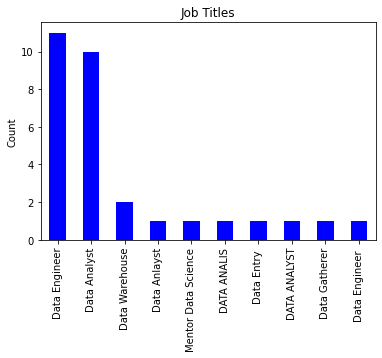

In [13]:
import matplotlib.pyplot as plt

# count masing-masing kategori
counts = df['title'].value_counts()

# bar plot
ax = counts.plot(kind='bar', color='blue')
ax.set_title('Job Titles')
ax.set_ylabel('Count')

plt.show()